In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [3]:
stopworsd=list(nlp.Defaults.stop_words)

In [4]:
df=pd.read_excel('mongodb_data.xlsx')

In [5]:
df=df.dropna()

In [6]:
df

,Publication number,Description
0,US2018300966A1,the invention relates to a method a processor ...
1,US2017236231A1,emergency evacuation is the immediate and urge...
2,US2017015177A1,the present invention relates in general to th...
3,WO2015143689A1,apparatus and method for improving air quality...
4,US2018176757A1,the invention relates to a method for providin...
...,...,...
193,US2017008467A1,this application contains subject matter relat...
194,US2012078468A1,this application contains subject matter relat...
195,US2012078496A1,this application contains subject matter relat...
196,US2012078467A1,this application contains subject matter relat...


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer()

In [8]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [9]:
text2=df['Description'][0]

In [10]:
from wordcloud import WordCloud

In [11]:
l=[]
for i in text2.split():
    if(i not in stopworsd):
        l.append(i)

In [12]:
text2[2]

'e'

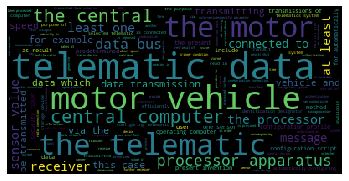

In [13]:
wordcloud2 = WordCloud().generate(text2)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
cv=CountVectorizer(max_df=0.85,min_df=2,stop_words='english',ngram_range=(1, 2))

In [16]:
dtm=cv.fit_transform(df['Description'])

In [17]:
dtm

<198x43118 sparse matrix of type '<class 'numpy.int64'>'
	with 218981 stored elements in Compressed Sparse Row format>

In [18]:
from sklearn.decomposition import LatentDirichletAllocation

In [19]:
lda=LatentDirichletAllocation(n_components=4,random_state=42)

In [20]:
lda.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=4, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [21]:
len(cv.get_feature_names())

43118

In [22]:
cv.get_feature_names()[6000]

'combining form'

In [23]:
print(len(lda.components_))

4


In [24]:
lda.components_

array([[ 0.2500001 ,  0.25000011,  0.25000011, ...,  0.25038371,
         2.24966161,  2.24966161],
       [14.24999974,  2.24999971,  2.24999971, ...,  0.25089012,
         0.25033817,  0.25033817],
       [ 0.25000008,  0.25000009,  0.25000009, ...,  3.24872605,
         0.25000011,  0.25000011],
       [ 0.25000008,  0.25000009,  0.25000009, ...,  0.25000012,
         0.25000011,  0.25000011]])

In [25]:
single_topic=lda.components_[0]

In [26]:
single_topic.argsort()

array([24483,  3870,   553, ...,  8864,  5341,  7996], dtype=int64)

In [27]:
import numpy as np

In [28]:
arr=np.array([10,200,1])

In [29]:
arr.argsort()

array([2, 0, 1], dtype=int64)

In [30]:
single_topic.argsort()[-10:]

array([33271, 18311, 42486, 25483,  9122, 10922, 13742,  8864,  5341,
        7996], dtype=int64)

In [31]:
top_ten_single_Atr=single_topic.argsort()[-20:]

In [32]:
for index in top_ten_single_Atr:
    print(cv.get_feature_names()[index])

point
electrical
store
storage
state
power
particular
display
program
control unit
second
image
voltage
operating
data
device
energy
current
charging
control


In [33]:

for index,topic in enumerate(lda.components_):
    print(f'Top 20 for {index}')
    print([cv.get_feature_names()[index1] for index1 in topic.argsort()[-200:]])

Top 20 for 0
['harness', 'time segment', 'fuse', 'operating mode', 'described document', 'inverter', 'potential', 'costs', 'carried', 'directly', 'multiplicity', 'error', 'energy storage', 'generated', 'programming unit', 'object', 'according aspect', 'starting', 'modules', 'browser', 'parameters', 'coupled', 'provide', 'controller', 'control units', 'message', 'graphical', 'coil', 'source', 'place', 'block', 'threedimensional', 'perspective transformation', 'determining', 'connecting', 'basic', 'voltage converter', 'operating location', 'arranged', 'apparatus', 'unit cu', 'tiles', 'fault', 'local', 'position', 'cu', 'graphics', 'able', 'mirror', 'conditioning', 'perspectively transformed', 'selected', 'purpose', 'perspectively', 'surface', 'available', 'segment', 'phase', 'strength', 'values', 'limit', 'dc', 'address', 'model', 'range', 'determine', 'locations', 'vehicles', 'reduced', 'element', 'advantageous', 'plurality', 'basis', 'stored', 'additional', 'machine', 'threshold value'

In [34]:
topic_results=lda.transform(dtm)

In [35]:
topic_results[1].argmax()

1

In [36]:
for i in topic_results[2]/np.sum(topic_results[2])*100:
    print(round(i,3))

0.007
99.98
0.007
0.007


In [37]:
np.sum(topic_results[2])

0.9999999999999999

In [38]:
df['topic']=topic_results.argmax(axis=1)

In [39]:
df

,Publication number,Description,topic
0,US2018300966A1,the invention relates to a method a processor ...,1
1,US2017236231A1,emergency evacuation is the immediate and urge...,1
2,US2017015177A1,the present invention relates in general to th...,1
3,WO2015143689A1,apparatus and method for improving air quality...,1
4,US2018176757A1,the invention relates to a method for providin...,1
...,...,...,...
193,US2017008467A1,this application contains subject matter relat...,3
194,US2012078468A1,this application contains subject matter relat...,3
195,US2012078496A1,this application contains subject matter relat...,3
196,US2012078467A1,this application contains subject matter relat...,3


In [40]:
df['topic'].value_counts()

1    66
3    49
0    43
2    40
Name: topic, dtype: int64

In [41]:
Mechanical=[]
Telecommunication=[]
Computer_technology=[]
def fun_to_app(i):
    Mechanical.append(round(i[0]/i.sum()*100,2))
    Telecommunication.append(round(i[2]/i.sum()*100,2))
    Computer_technology.append(round(i[3]/i.sum()*100,2))
#     other.append(round(i[3]/i.sum()*100,2))

In [42]:
for i in range(len(topic_results)):
    fun_to_app(topic_results[i])

In [43]:
df['Mechanical']=Mechanical
df['Telecommunication']=Telecommunication
df['Computer_technology']=Computer_technology
# df['other']=other

In [44]:
# df=df.drop(['Mechanical','Computer','Electrical'],axis=1)

In [45]:
topic_results[19]/topic_results[197].sum()

array([9.31646268e-01, 7.87447002e-05, 6.81965702e-02, 7.84169712e-05])

In [46]:
df[df['Publication number']=='US2018176757A1']

,Publication number,Description,topic,Mechanical,Telecommunication,Computer_technology
4,US2018176757A1,the invention relates to a method for providin...,1,0.01,7.58,0.01


In [47]:
df.to_csv('Output_file1.csv',index=False)

In [48]:
dae['Publication number'].values

NameError: name 'dae' is not defined

In [ ]:
df[df['Publication number']=='US2012209487A1']

In [ ]:
df.iloc[116]

In [ ]:
df